In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)

2.2.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("drive/My Drive/data/labels.csv")

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
df["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
fnames = ['drive/My Drive/data/train/' + i +'.jpg' for i in df["id"]]

In [ ]:
fnames[10]

In [ ]:
import os
len(os.listdir('drive/My Drive/data/train/')) == len(fnames)

In [ ]:
from IPython.display import Image
Image(fnames[50])

NameError: ignored

In [ ]:
labels = df["breed"].to_numpy()
labels

NameError: ignored

In [ ]:
len(labels) == len(fnames)

True

In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
 boolean_labels  = [label == unique_breeds for label in labels]

In [ ]:
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
x = fnames
y = boolean_labels

In [ ]:
NUM_IMAGES = 1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state = 42)

In [ ]:
from matplotlib.pyplot import imread
image = imread(fnames[0])
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [ ]:
def process_image(image_path,IMG_SIZE=(224,224)):
  """
  takes image and gives out tensor of that image

  """
  #reads the image
  image = tf.io.read_file(image_path)
  # turn the image into tensor
  image = tf.image.decode_jpeg(image,channels=3)
  # turns tensor in a range between 0 and 1
  image = tf.image.convert_image_dtype(image,tf.float32)
  # resizes the image 
  image = tf.image.resize(image,size=IMG_SIZE)
  return image

In [ ]:
process_image(fnames[0])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.30642927],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.42554107, 0.27039403, 0.12009468],
        [0.7887875 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.88609535, 0.7585918 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.71

In [ ]:
# function for returning image and its label in a tuple
def get_image_label(img,label):
  return process_image(img),label

In [ ]:
get_image_label(x[10],y[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41753423, 0.38224012, 0.40184796],
         [0.4316044 , 0.39631027, 0.4159181 ],
         [0.40602714, 0.37879497, 0.3957155 ],
         ...,
         [0.19028023, 0.17067239, 0.18635866],
         [0.28062278, 0.26101494, 0.2767012 ],
         [0.28965282, 0.27004498, 0.28573126]],
 
        [[0.36733648, 0.33204237, 0.3516502 ],
         [0.3150591 , 0.27976498, 0.29937282],
         [0.29561085, 0.26837867, 0.2852992 ],
         ...,
         [0.23583163, 0.21230222, 0.22014536],
         [0.2812507 , 0.25772128, 0.2655644 ],
         [0.26320195, 0.23967254, 0.24751568]],
 
        [[0.40703085, 0.3717367 , 0.3907143 ],
         [0.46396694, 0.42867282, 0.4476504 ],
         [0.5020599 , 0.47482777, 0.491118  ],
         ...,
         [0.27574417, 0.24076518, 0.24374136],
         [0.30945447, 0.27447549, 0.27745166],
         [0.25501153, 0.22003253, 0.22300872]],
 
        ...,
 
        [[0.26359692, 0.28712633

In [ ]:
# creating data batches
def data_batch(x,y=None,batchsize=32,valid_data=False,test_data = False):
  if test_data:
    print("creating data batchs with test data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))#only file paths no labels
    data_batchs = data.map(process_image).batch(batchsize)
    return data_batchs

  elif valid_data:
    print("creating data batchs with validation data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# images with labels
    data_batchs = data.map(get_image_label).batch(batchsize)
    return data_batchs
  else:
    print("creating data batchs with training data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# images with labels
    data = data.shuffle(buffer_size=len(x))
    data_batchs = data.map(get_image_label).batch(batchsize)
    return data_batchs


In [ ]:
train_data = data_batch(x_train,y_train)
valid_data = data_batch(x_val,y_val,valid_data=True)


creating data batchs with training data
creating data batchs with validation data


In [ ]:
# visualising the data
def show_25_images(images,labels,n=25):
  """
  shows the plot of 25 images
  """
  #setting figure
  plt.figure(figsize=(10,10))
  #loop through 25 images
  for i in range(n):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

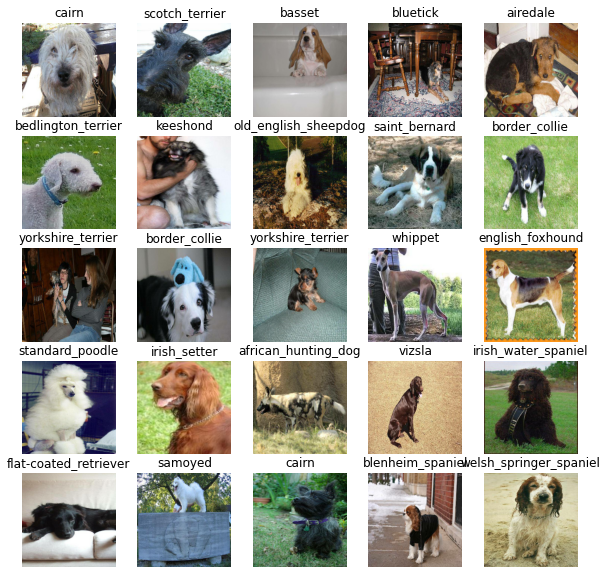

In [ ]:
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [ ]:
## Building the model
INPUT_SHAPE = [None,224,224,3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'  

In [ ]:
def build_model(input_shape=INPUT_SHAPE,outpu_shape= OUTPUT_SHAPE,model_url = MODEL_URL):
  print("building model with", MODEL_URL)

  #setting up the layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),
                              tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])# layer 2 Output layer
  # compiling the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"] )
  # building the model
  model.build(INPUT_SHAPE)

  return model
  

In [ ]:
model = build_model()
model.summary()

building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_1 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# creating call backs
%load_ext tensorboard

In [ ]:
import datetime
def tensorboard_callbacks():
  logdir = os.path.join("drive/My Drive/data/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
  # early stoping callback to prevent over or under fiiting
  early_stoping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

##Training the model 
 on subset of 1000 images

In [ ]:
  NUM_EPOCS = 100 #@param{type:"slider",min:10,max:100,step:10}
  

In [ ]:
# test if gpu is available
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
def train_model():
  """
  trains the given model and returns given model
  """
  # building the model
  model = build_model()
  # tensor board call back function
  tensorboard =  tensorboard_callbacks()
  # fitting the model to data with callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCS,
            validation_data= valid_data,
            validation_freq= 1,
            callbacks =[tensorboard,early_stoping])
  return model

In [ ]:
model = train_model()

building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 2/25 [=>............................] - ETA: 2:53 - loss: 5.6221 - accuracy: 0.0000e+00

In [ ]:
%tensorboard --logdir drive/My\ Drive/data/logs

In [ ]:
preds = model.predict(valid_data,verbose=1)

In [ ]:
print(preds[0])
print(f"Max value (probability): {np.max(preds[0])}")
print(f"predicted label: {unique_breeds[np.argmax(preds[0])]}") 

In [ ]:
# function for visualising our predictions
def get_img_name(preds_proba):
  """
  turns array of prediction probabilities into labels
  """
  return unique_breeds[np.argmax(preds_proba)]

In [ ]:
imgs = []
names = []

for img,name in valid_data.unbatch().as_numpy_iterator():
  imgs.append(img)
  names.append(name)
imgs[1]

array([[[0.96018916, 0.97587544, 0.979797  ],
        [0.9617217 , 0.977408  , 0.98132956],
        [0.9651424 , 0.9808287 , 0.9847503 ],
        ...,
        [0.95294124, 0.9725491 , 0.9960785 ],
        [0.94906336, 0.9686712 , 0.9922006 ],
        [0.94802153, 0.9676294 , 0.9911588 ]],

       [[0.97587544, 0.9915617 , 0.9954833 ],
        [0.9765078 , 0.99219406, 0.9961156 ],
        [0.9802049 , 0.99589115, 0.99981266],
        ...,
        [0.96018916, 0.979797  , 1.        ],
        [0.9563113 , 0.9759191 , 0.9994114 ],
        [0.95366776, 0.9732756 , 0.99680495]],

       [[0.9686275 , 0.9843138 , 0.98823535],
        [0.9689829 , 0.98466915, 0.9885907 ],
        [0.972765  , 0.9884513 , 0.9923729 ],
        ...,
        [0.9677083 , 0.98731613, 1.        ],
        [0.9650211 , 0.9846289 , 1.        ],
        [0.9610995 , 0.98070735, 0.9960785 ]],

       ...,

       [[0.29487073, 0.40404442, 0.24774945],
        [0.1316065 , 0.22889124, 0.11186215],
        [0.19447322, 0

In [ ]:
get_img_name(names[0])

In [ ]:
def unbatchify(data):
  imgs = []
  names = []

  for img,name in data.unbatch().as_numpy_iterator():
      imgs.append(img)
      names.append(get_img_name(name))
  return imgs,names


In [ ]:
valid_images, valid_labels = unbatchify(valid_data) 

In [ ]:
def plot_preds(preds_probability,labels,images,n=1):
  """
  shows prediction,grounf truth,and img label
  """
  preds_proba,truth_label,image =preds[n],names[n],imgs[n]
  pred_label = get_img_name(preds_proba)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == get_img_name(truth_label):
    color = "green"
  else:
    color = "red"
  plt.title(f"predicted label: {pred_label},  probability: {(np.max(preds_proba)*100):2.0f}%,  Actual label: {get_img_name(truth_label)} ",color= color)

In [ ]:
plot_preds(preds_probability=preds,labels=valid_labels,images=valid_images,n=5)

In [ ]:
def save_model(model,suffix=None):
  m = os.path.join("/content/drive/My Drive/data/models",datetime.datetime.now().strftime("%Y-%m-%d - %H:%M"))
  print('saving model at', m)
  model_path = m + "-" + suffix +".h5"
  model.save(model_path)

In [ ]:
def load_model(path):
  print("loading model from", path)
  model = tf.keras.models.load_model(path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model,"1000 images")

##Training model with full data

In [ ]:
#creating batch
full_databatch = data_batch(x,y)



creating data batchs with training data


In [ ]:
full_model = build_model(outpu_shape=OUTPUT_SHAPE,model_url=MODEL_URL) 

In [ ]:
full_model_tensorboard = tensorboard_callbacks()
full_model_early = tf.keras.callbacks.EarlyStopping(monitor= "accuracy",patience=3)

In [ ]:
full_model.fit(x=full_databatch,epochs=100,callbacks=[full_model_tensorboard,full_model_early])

In [ ]:
 save_model(full_model,"FULL_MODEL")

In [ ]:
custom_img = ['drive/My Drive/data/doggo/' + i for i in os.listdir("drive/My Drive/data/doggo/")]
custom_img

['drive/My Drive/data/doggo/german-shepherd-runt-of-litter.jpg',
 'drive/My Drive/data/doggo/Siberian-Husky-standing-outdoors-in-the-winter.jpg',
 'drive/My Drive/data/doggo/Chihuahua-standing-in-three-quarter-view.jpg',
 'drive/My Drive/data/doggo/WhatsApp Image 2020-07-22 at 6.08.24 PM.jpeg',
 'drive/My Drive/data/doggo/japanese_shibu_inu.jpg']

In [ ]:
custom_batch = data_batch(custom_img,test_data=True)
custom_batch

creating data batchs with test data


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
def custom_unbachify(custom_batch):
   images = []
   for image in custom_batch.unbatch().as_numpy_iterator():
     images.append(image)
   return images
# images = custom_unbachify(custom_batch)

In [ ]:
#function for plotting custom images
def cust_img_show(images,custom_label):
  plt.figure(figsize=(20,5))
  for i in range(len(images)):
    plt.subplot(1,5,i+1)#creating subplots
    plt.xticks([])#no xticks
    plt.yticks([])# no yticks
    plt.title(custom_label[i])#title is the image label
    plt.imshow(images[i])#plotting the image and its label


In [ ]:
#loading our saved model
full_model = load_model("drive/My Drive/data/models/2020-07-22 - 12:37-FULL_MODEL.h5")

loading model from drive/My Drive/data/models/2020-07-22 - 12:37-FULL_MODEL.h5


In [ ]:
custom_preds = full_model.predict(custom_batch)

In [ ]:
custom_label = [get_img_name(custom_preds[i]) for i in range(len(custom_preds))]

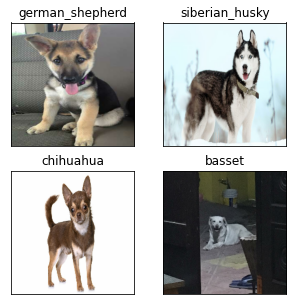

In [ ]:
cust_img_show(images,custom_label)

In [ ]:
type(full_model)

tensorflow.python.keras.engine.sequential.Sequential

In [ ]:

full_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_2 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


##Fine tuning our model

In [ ]:
# adding mobilenet layers to our model 
model = tf.keras.Sequential()
for layer in full_model.layers:# accesing layers of mobilenet
  model.add(layer) # adding layers

In [ ]:
for layer in model.layers:
  layer.trainable= False

In [ ]:
#COMPILING OUR MODEL;
model.compile(optimizer=tf.optimizers.Adam(),loss= tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
model_tensorboard = tensorboard_callbacks()
model_early = tf.keras.callbacks.EarlyStopping(monitor= "accuracy",patience=3)

In [ ]:
model.fit(full_databatch,epochs=100,callbacks=[model_tensorboard,model_early])

Epoch 1/100
320/320 [==============================] - 3510s 11s/step - loss: 0.0070 - accuracy: 0.9993
Epoch 2/100
320/320 [==============================] - 73s 228ms/step - loss: 0.0070 - accuracy: 0.9993
Epoch 3/100
320/320 [==============================] - 73s 228ms/step - loss: 0.0070 - accuracy: 0.9993
Epoch 4/100
320/320 [==============================] - 73s 229ms/step - loss: 0.0070 - accuracy: 0.9993


In [ ]:
save_model(model,"Fine-Tuned")

saving model at /content/drive/My Drive/data/models/2020-07-22 - 18:36


In [ ]:
custom_preds= model.predict(custom_batch)

In [ ]:
custom_label = [get_img_name(custom_preds[i]) for i in range(len(custom_preds))]

In [ ]:
images = custom_unbachify(custom_batch)

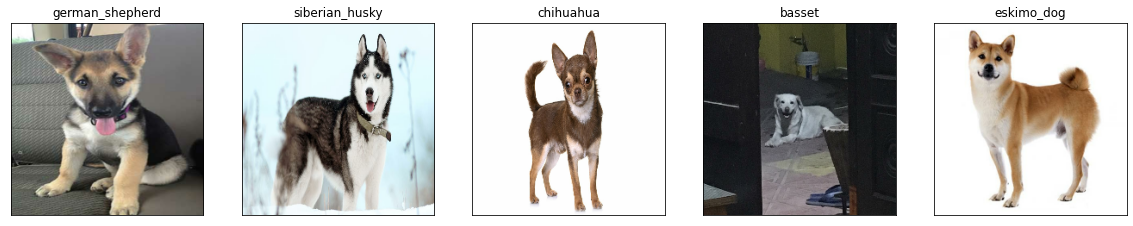

In [ ]:
cust_img_show(images,custom_label)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_2 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 0
Non-trainable params: 5,552,953
_________________________________________________________________
